In [150]:
import pandas as pd
from datetime import datetime, timedelta
from openpyxl import Workbook
def ccn(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]


In [2]:
# import data
clubdata = pd.read_excel('./datasets/FitSmallBusinessExcelTest.xlsx', sheet_name='CLUBDATA', header=1)
ccn(clubdata)
fitnesstable = pd.read_excel('./datasets/FitSmallBusinessExcelTest.xlsx', sheet_name='FITNESS TABLE', header=1)
ccn(fitnesstable)
data_description = pd.read_excel('./datasets/FitSmallBusinessExcelTest.xlsx', nrows=1, usecols=['Unnamed: 15'])
print(data_description.iloc[0,0])

The Patagonia Exploration Club International (PECI) is a group of diverse individuals across many countries. 
Jennifer Cardozo, the club's President, has taken up the challenge to systematize the membership roster. 
In a very short time, she has pulled together a lot of information! 
An extract of 50 such records is available on the tab, CLUBDATA. 
This is the portion, where PECI needs your EXCEL expertise... 


In [3]:
task_list = pd.read_excel('./datasets/FitSmallBusinessExcelTest.xlsx', 
            header=3, usecols=['ACTIVITIES', 'INSTRUCTION'])

In [366]:
def print_task_description(task_no: int) -> None:
    # Funtion for printing instructions for particular task.
    print(task_list[task_list['Activities'.upper()] == task_no]['instruction'.upper()].iloc[0])
    idx = task_list[task_list['Activities'.upper()] == task_no].index
    while pd.isnull(task_list.iloc[idx+1,:]['Activities'.upper()]).bool():
        try:
            if not task_list.iloc[idx+1]['instruction'.upper()].iloc[0].startswith('STAGE'):
                print(task_list.iloc[idx+1]['instruction'.upper()].iloc[0])
        except:
            print('It`s the last one task')
            break
        idx+=1


#### Task 1

In [362]:
print_task_description(1)

Populate the FULLNAME consisting of the following fields ONLY, in the prescribed format: PREFIX FIRSTNAME LASTNAME. (Note: All UPPERCASE)


In [6]:
clubdata.full_name = clubdata.prefix.str.upper() + ' ' + clubdata.firstname.str.upper() + ' ' + clubdata.lastname.str.upper()
# printing firs five rows
clubdata.head()

,index,full_name,prefix,firstname,middlename,lastname,suffix,birthdate,zodiac,email_address,...,favorite_color,sex,language,country,countrycode,height_(inches),weight_(lbs),peci-score,peci-code,status
0,1,MS. ANNIE ABBOTT,Ms.,Annie,NaN,Abbott,DVM,1997-09-26,Libra,NaN,...,silver,Female,English,USA,US,NaN,NaN,NaN,NaN,NaN
1,2,MS. AURELIE LIESUCHKE,Ms.,Aurelie,NaN,Liesuchke,NaN,1992-02-07,Aquarius,NaN,...,blue,Female,English,USA,US,NaN,NaN,NaN,NaN,NaN
2,3,SR. TOMAS FILHO,Sr.,Tomas,Ferreira,Filho,NaN,1969-07-10,Cancer,NaN,...,teal,Male,Portuguese,BRAZIL,BR,NaN,NaN,NaN,NaN,NaN
3,4,MS. DARBY CRUICKSHANK,Ms.,Darby,NaN,Cruickshank,Sr.,1975-05-18,Taurus,NaN,...,aqua,Female,English,USA,US,NaN,NaN,NaN,NaN,NaN
4,5,DR. JAYDON BORER,Dr.,Jaydon,NaN,Borer,MD,1970-05-18,Taurus,NaN,...,gray,Male,English,USA,US,NaN,NaN,NaN,NaN,NaN


#### Task 2

In [7]:
print_task_description(2)

Generate the EMAIL ADDRESS for those members, who speak English, in the prescribed format : lastname.firstname@pecinow.org. (Note: All lowercase)


In [8]:
clubdata.loc[clubdata.language == 'English', 'email_adress'] = \
clubdata.firstname.str.lower() + clubdata.lastname.str.lower()+'@pecinow.org'

In [9]:
# printing first five rows with the variables of interest
clubdata[['firstname', 'lastname', 'language', 'email_adress']].head()

,firstname,lastname,language,email_adress
0,Annie,Abbott,English,annieabbott@pecinow.org
1,Aurelie,Liesuchke,English,aurelieliesuchke@pecinow.org
2,Tomas,Filho,Portuguese,NaN
3,Darby,Cruickshank,English,darbycruickshank@pecinow.org
4,Jaydon,Borer,English,jaydonborer@pecinow.org


#### Task 3

In [10]:
print_task_description(3)

Generate the USER NAME for only those members, who don't speak English, in the prescribed format : FIRSTNAME(Initial in Uppercase)LASTNAME(lowercase)COUNTRYCODE.INDEX


In [11]:
clubdata.loc[clubdata.language != 'English', 'username'] = \
clubdata.firstname.str[0].str.upper()+clubdata.lastname.str.lower()+clubdata.countrycode

# printing first five rows with the variables of interest
clubdata[['firstname', 'lastname', 'username', 'language']].head()

,firstname,lastname,username,language
0,Annie,Abbott,NaN,English
1,Aurelie,Liesuchke,NaN,English
2,Tomas,Filho,TfilhoBR,Portuguese
3,Darby,Cruickshank,NaN,English
4,Jaydon,Borer,NaN,English


#### Task 4

In [12]:
print_task_description(4)

CONVERT only the Columns 2, 10 and 11 to NUMERICAL values. (NO FORMULAS MUST BE VISIBLE.)


In [13]:
# five first rows with the variables of interest 
clubdata.iloc[:5,[2-1, 10-1, 11-1]]

,full_name,email_address,username
0,MS. ANNIE ABBOTT,NaN,NaN
1,MS. AURELIE LIESUCHKE,NaN,NaN
2,SR. TOMAS FILHO,NaN,TfilhoBR
3,MS. DARBY CRUICKSHANK,NaN,NaN
4,DR. JAYDON BORER,NaN,NaN


**Changing data types for columns 2,10,11 to numeric type is not appropriate, because that cells have data in type ‘string’ without any numbers.**

#### Task 5

In [14]:
print_task_description(5)

Col.13 has the members' height in CENTIMETERS. Jennifer needs it converted to INCHES in column 25, rounded to ONE significant digit. ( Note: 1 cm = 0.3937007874 inch. )


In [15]:
# height in cms is saved in col.12 not in col.13
inch_rate = 0.3937007874
clubdata.iloc[:,[12-1,25-1]].head()

,height_(cms),height_(inches)
0,205,NaN
1,205,NaN
2,185,NaN
3,175,NaN
4,168,NaN


In [16]:
clubdata['height_(inches)'] = round(clubdata['height_(cms)'] * inch_rate,1)
# printing first five results
clubdata.iloc[:5,[12-1,25-1]]

,height_(cms),height_(inches)
0,205,80.7
1,205,80.7
2,185,72.8
3,175,68.9
4,168,66.1


#### Task 6

In [17]:
print_task_description(6)

Col.14 has the members' weight in KILOGRAMS. Jennifer needs it converted to POUNDS in column 26, rounded to TWO significant digits. ( Note: 1 Kg = 2.2046226218 Lbs. )


In [18]:
# the same situation like in previous task
clubdata.iloc[:5,[13-1, 26-1]]

,weight_(kgs),weight_(lbs)
0,94.0,NaN
1,84.2,NaN
2,52.9,NaN
3,48.9,NaN
4,84.8,NaN


In [19]:
lbs_rate = 2.2046226218
clubdata['weight_(lbs)'] = round(clubdata['weight_(kgs)'] * lbs_rate,1)
clubdata.iloc[:5,[13-1, 26-1]]

,weight_(kgs),weight_(lbs)
0,94.0,207.2
1,84.2,185.6
2,52.9,116.6
3,48.9,107.8
4,84.8,187.0


#### Task 7

In [20]:
print_task_description(7)

Using data computed in Col.25 and Col.26, calculate PECI-SCORE in Col.27 using the formula : 703 x Weight [ LBS] / ( Height [ INCH]^2 ). Ensure that the calculated number is ROUNDED to one significant digit after decimal.


In [21]:
clubdata['peci-score'] = round((clubdata['weight_(lbs)'] * 703)/(clubdata['height_(inches)']**2),1)
clubdata.iloc[:5,[25-1,26-1,27-1]]

,height_(inches),weight_(lbs),peci-score
0,80.7,207.2,22.4
1,80.7,185.6,20.0
2,72.8,116.6,15.5
3,68.9,107.8,16.0
4,66.1,187.0,30.1


#### Task 8

In [22]:
print_task_description(8)

Using data computed in Col.27, use VLOOKUP to populate PECI-CODE from the tab FITNESS TABLE. Use AUTOFILL. Right justify the results. 


In [39]:
# to complete this task, I decide to use different method than VLOOKUP (merge in Pandas)


In [24]:
# range for each category
peci_range=fitnesstable.groupby(by=['peci-code']).agg({'peci-score':['min','max']})\
    .sort_values(by=[('peci-score','min')]).reset_index()
peci_range

peci-code peci-score    
                   min max
0         W          1  18
1         F         19  24
2         U         25  30
3         P         31  65

In [34]:
# create category data in peci-codd column
clubdata['peci-code'] = pd.cut(clubdata['peci-score'], 
                bins=(peci_range[('peci-score','min')].to_list()+[peci_range.iloc[:,2].max()]),
                labels = peci_range['peci-code'].to_list())

In [35]:
# checking results
clubdata[['peci-score', 'peci-code']].head()

,peci-score,peci-code
0,22.4,F
1,20.0,F
2,15.5,W
3,16.0,W
4,30.1,U


#### Taks 9

In [37]:
print_task_description(9)

Use IF formula to tag the PECI-CODE in Col.28 with these conditional STATUS : If 'W', tag 'POSTPONE'. If 'U', tag 'EXAMINE', if 'P', tag 'REFUSE', if 'F',  tag 'ADMIT'. Right justify the results. 


In [48]:
status_dict = {'W':'POSTPONE', 'U':'EXAMINE', 'P':'REFUSE', 'F':'ADMIT'}
clubdata.status = clubdata['peci-code'].apply(lambda x: status_dict.get(x))
# printing sample 
clubdata.iloc[:5,[28-1, 29-1]]

,peci-code,status
0,F,ADMIT
1,F,ADMIT
2,W,POSTPONE
3,W,POSTPONE
4,U,EXAMINE


#### Task 10

In [140]:
print_task_description(10)

Create a PIVOT table in the tab, PIVOT, starting at cell B3, with the following details: 
In COLUMNS (Group : YEARS only. Remove QUARTERS and BIRTHDATE.)
In ROWS (Group : SEX. COUNTRY.)
In VALUES (Calculate AVERAGE OF HEIGHT IN INCHES, formatted as ##.#)
Remove GRAND TOTAL
Freeze both panes from cell D5.
Adjust COLUMN WIDTH from D to the end of the PIVOT table, to the value, 8.


In [184]:
pd.options.display.max_columns = 100
pv_height=clubdata.pivot_table(index=['sex', 'country'], 
                    values=['height_(inches)'],
                    columns = [clubdata.birthdate.apply(lambda x: datetime.now().year - x.year).rename('age')],
                    aggfunc='mean')

# printing result data
pv_height.fillna('')

height_(inches)                                            \
age                             23    25    26    28    29    30    32    33   
sex    country                                                                 
Female ARGENTINA                                                               
       AUSTRALIA              81.1                                             
       AUSTRIA                                  81.1                           
       FRANCE                                                           70.9   
       GERMANY                                                                 
       NETHERLANDS                                                             
       SPAIN                                                      72.8         
       SWEDEN                       62.2                                       
       UK                                                                      
       USA                    64.6  80.7                    80.7               
Male   ARGENTINA                                                               
       AUSTRALIA                          63.4                                 
       AUSTRIA                                                                 
       BRAZIL                                         79.9                     
       FRANCE                                                                  
       GERMANY                                                                 
       NETHERLANDS                                                             
       SWEDEN                                                                  
       UK                                                                      
       USA                                                  79.1               

                                                                          \
age                   34    35    36    38    39    40    41    42    43   
sex    country                                                             
Female ARGENTINA                                                           
       AUSTRALIA                                                           
       AUSTRIA                                                             
       FRANCE                                                       57.9   
       GERMANY                                                             
       NETHERLANDS                                                         
       SPAIN                                                               
       SWEDEN                                                              
       UK                                                                  
       USA                                                                 
Male   ARGENTINA    62.6              77.2                                 
       AUSTRALIA                                                           
       AUSTRIA                                    68.5                     
       BRAZIL                                                              
       FRANCE                   77.6        70.5        57.5  58.7         
       GERMANY                                                             
       NETHERLANDS                                                         
       SWEDEN             78.7                                             
       UK                       74.8                                       
       USA                                                                 

                                                                           \
age                   44     45    46    47    48    49    50    51    52   
sex    country                                                              
Female ARGENTINA                             60.6                           
       AUSTRALIA    79.1   61.0                                             
       AUSTRIA                              

#### Task 11

In [185]:
print_task_description(11)

Make a duplicate of the PIVOT tab. RENAME it to RECORDCOUNT
Change VALUE to COUNT.


In [187]:
pv_recordcount=clubdata.pivot_table(index=['sex', 'country'], 
                    values=['height_(inches)'],
                    columns = [clubdata.birthdate.apply(lambda x: datetime.now().year - x.year).rename('age')],
                    aggfunc='count')

# printing result data
pv_recordcount.fillna('')

height_(inches)                                          \
age                             23   25   26   28   29   30   32   33   34   
sex    country                                                               
Female ARGENTINA                                                             
       AUSTRALIA               1.0                                           
       AUSTRIA                                1.0                            
       FRANCE                                                     1.0        
       GERMANY                                                               
       NETHERLANDS                                                           
       SPAIN                                                 1.0             
       SWEDEN                       1.0                                      
       UK                                                                    
       USA                     1.0  1.0                 1.0                  
Male   ARGENTINA                                                       1.0   
       AUSTRALIA                         1.0                                 
       AUSTRIA                                                               
       BRAZIL                                      1.0                       
       FRANCE                                                                
       GERMANY                                                               
       NETHERLANDS                                                           
       SWEDEN                                                                
       UK                                                                    
       USA                                              1.0                  

                                                                           \
age                  35   36   38   39   40   41   42   43   44   45   46   
sex    country                                                              
Female ARGENTINA                                                            
       AUSTRALIA                                            1.0  1.0        
       AUSTRIA                                                              
       FRANCE                                          1.0                  
       GERMANY                                                              
       NETHERLANDS                                                          
       SPAIN                                                                
       SWEDEN                                                               
       UK                                                        2.0        
       USA                                                                  
Male   ARGENTINA              1.0                                           
       AUSTRALIA                                                      1.0   
       AUSTRIA                          1.0                                 
       BRAZIL                                                               
       FRANCE            1.0       1.0       1.0  1.0                       
       GERMANY                                                              
       NETHERLANDS                                                          
       SWEDEN       1.0                                                     
       UK                1.0                                                
       USA                                                                  

                                                                           \
age                  47   48   49   50   51   52   53   54   56   57   58   
sex    country                                                              
Female ARGENTINA         1.0                                                
       AUSTRALIA                                            1.0       1.0   
       AUSTRIA                                                     

#### Task 12

In [189]:
print_task_description(12)

In the GRAND TOTAL column, double click the total for row FEMALE TOTAL. (This will result in a separate tab with all records where SEX = Female).
RENAME the resulting tab, ALLFEMALE.


In [198]:
pv_allfemale=pv_recordcount[pv_recordcount.index.get_level_values(0) == 'Female']

# print the total of female from every country
pd.DataFrame(pv_allfemale.sum(axis=1)).rename(columns={0:'all_female'}).astype(int)

all_female
sex    country                
Female ARGENTINA             1
       AUSTRALIA             6
       AUSTRIA               1
       FRANCE                3
       GERMANY               1
       NETHERLANDS           2
       SPAIN                 3
       SWEDEN                1
       UK                    3
       USA                   4

In [206]:
allfemale = clubdata[clubdata.sex == 'Female'].drop(columns=['index'])
allfemale.head()

,full_name,prefix,firstname,middlename,lastname,suffix,birthdate,zodiac,email_address,username,height_(cms),weight_(kgs),eyecolor,bloodtype,hairtype,haircolor,sports_location,sports,favorite_color,sex,language,country,countrycode,height_(inches),weight_(lbs),peci-score,peci-code,status,email_adress
0,MS. ANNIE ABBOTT,Ms.,Annie,NaN,Abbott,DVM,1997-09-26,Libra,NaN,NaN,205,94.0,Green,A−,Strands,Black,INDOOR,Cycling Track,silver,Female,English,USA,US,80.7,207.2,22.4,F,ADMIT,annieabbott@pecinow.org
1,MS. AURELIE LIESUCHKE,Ms.,Aurelie,NaN,Liesuchke,NaN,1992-02-07,Aquarius,NaN,NaN,205,84.2,Brown,O−,Curly,Blond,INDOOR,Boxing,blue,Female,English,USA,US,80.7,185.6,20.0,F,ADMIT,aurelieliesuchke@pecinow.org
3,MS. DARBY CRUICKSHANK,Ms.,Darby,NaN,Cruickshank,Sr.,1975-05-18,Taurus,NaN,NaN,175,48.9,Green,O−,Strands,Black,OUTDOOR,Alpine Skiing,aqua,Female,English,USA,US,68.9,107.8,16.0,W,POSTPONE,darbycruickshank@pecinow.org
6,MS. AMIYA EICHMANN,Ms.,Amiya,NaN,Eichmann,NaN,1999-07-29,Leo,NaN,NaN,164,61.1,Blue,B−,Wavy,Brown,OUTDOOR,Cycling Road,olive,Female,English,USA,US,64.6,134.7,22.7,F,ADMIT,amiyaeichmann@pecinow.org
8,MS. AMELIA STEVENS,Ms.,Amelia,NaN,Stevens,NaN,1971-02-01,Aquarius,NaN,NaN,167,65.3,Blue,A+,Wavy,Blond,INDOOR,Shooting,silver,Female,English,UK,GB,65.7,144.0,23.5,F,ADMIT,ameliastevens@pecinow.org


#### Task 13

In [207]:
print_task_description(13)

In a SINGLE STEP, SORT the tab ALLFEMALE, in the following NESTING order : 1. Alphabetically descending order for LASTNAME. 2. By newest to oldest BIRTHDATE.


In [210]:
# sorted allfemale data frame
allfemale.sort_values(by=['lastname', 'birthdate'], ascending=[True, False]).reset_index(drop=True)

,full_name,prefix,firstname,middlename,lastname,suffix,birthdate,zodiac,email_address,username,height_(cms),weight_(kgs),eyecolor,bloodtype,hairtype,haircolor,sports_location,sports,favorite_color,sex,language,country,countrycode,height_(inches),weight_(lbs),peci-score,peci-code,status,email_adress
0,MS. ANNIE ABBOTT,Ms.,Annie,NaN,Abbott,DVM,1997-09-26,Libra,NaN,NaN,205,94.0,Green,A−,Strands,Black,INDOOR,Cycling Track,silver,Female,English,USA,US,80.7,207.2,22.4,F,ADMIT,annieabbott@pecinow.org
1,DR. TIA ABSHIRE,Dr.,Tia,NaN,Abshire,NaN,1966-07-21,Cancer,NaN,NaN,203,77.8,Amber,A+,Straight,Brown,OUTDOOR,Cycling Road,navy,Female,English,AUSTRALIA,OZ,79.9,171.5,18.9,W,POSTPONE,tiaabshire@pecinow.org
2,SRA. ISABEL BANDA,Sra.,Isabel,NaN,Banda,NaN,1960-01-12,Capricorn,NaN,IbandaES,178,102.3,Amber,O+,Straight,Brown,OUTDOOR,Canoe Slalom,gray,Female,Spanish,SPAIN,ES,70.1,225.5,32.3,P,REFUSE,NaN
3,DR. SHANNY BINS,Dr.,Shanny,NaN,Bins,NaN,1999-08-28,Virgo,NaN,NaN,206,59.4,Amber,B−,Straight,Blond,OUTDOOR,Canoe Slalom,silver,Female,English,AUSTRALIA,OZ,81.1,131.0,14.0,W,POSTPONE,shannybins@pecinow.org
4,MME. LAURE-ALIX CHEVALIER,Mme.,Laure-Alix,NaN,Chevalier,NaN,1970-12-23,Capricorn,NaN,LchevalierFR,181,78.1,Blue,O+,Wavy,Brown,OUTDOOR,Beach Volleyball,yellow,Female,French,FRANCE,FR,71.3,172.2,23.8,F,ADMIT,NaN
5,MS. DARBY CRUICKSHANK,Ms.,Darby,NaN,Cruickshank,Sr.,1975-05-18,Taurus,NaN,NaN,175,48.9,Green,O−,Strands,Black,OUTDOOR,Alpine Skiing,aqua,Female,English,USA,US,68.9,107.8,16.0,W,POSTPONE,darbycruickshank@pecinow.org
6,MME. PAULETTE DURAND,Mme.,Paulette,NaN,Durand,NaN,1989-12-25,Capricorn,NaN,PdurandFR,180,81.7,Amber,O−,Straight,Chestnut,INDOOR,Volleyball,aqua,Female,French,FRANCE,FR,70.9,180.1,25.2,U,EXAMINE,NaN
7,MS. AMIYA EICHMANN,Ms.,Amiya,NaN,Eichmann,NaN,1999-07-29,Leo,NaN,NaN,164,61.1,Blue,B−,Wavy,Brown,OUTDOOR,Cycling Road,olive,Female,English,USA,US,64.6,134.7,22.7,F,ADMIT,amiyaeichmann@pecinow.org
8,SRA. AINHOA GARZA,Sra.,Ainhoa,NaN,Garza,NaN,1990-03-09,Pisces,NaN,AgarzaES,185,55.6,Brown,O+,Curly,Blond,INDOOR,Gymnastics Artistic,blue,Female,Spanish,SPAIN,ES,72.8,122.6,16.3,W,POSTPONE,NaN
9,MS. AURELIE LIESUCHKE,Ms.,Aurelie,NaN,Liesuchke,NaN,1992-02-07,Aquarius,NaN,NaN,205,84.2,Brown,O−,Curly,Blond,INDOOR,Boxing,blue,Female,English,USA,US,80.7,185.6,20.0,F,ADMIT,aurelieliesuchke@pecinow.org


#### Task 14

In [212]:
print_task_description(14)

Add a column at the end of this table, YEAR. EXTRACT the YEAR for each record from the BIRTHDATE, using the appropriate formula.


In [216]:
allfemale['year'] = allfemale.birthdate.apply(lambda x: x.year)

# result sample
allfemale[['birthdate', 'year']].head()

,birthdate,year
0,1997-09-26,1997
1,1992-02-07,1992
3,1975-05-18,1975
6,1999-07-29,1999
8,1971-02-01,1971


#### Task 15

In [218]:
print_task_description(15)

The column ZODIAC, is extraneous to this dataset. HIDE the column from THIS TAB ONLY.


In [220]:
clubdata = clubdata.drop(columns=['zodiac'])
allfemale = allfemale.drop(columns=['zodiac'])

#### Task 16

In [222]:
print_task_description(16)

On its OWN TAB, create a PIVOT CHART using the following COLUMNS: SPORTS LOCATION, SPORTS, FAVORITE COLOR, SEX, LANGUAGE, COUNTRY. Name this tab, ALLFEMALESPORTS.
Under LEGENDS: Show SPORTS LOCATION (E.g. OUTDOOR and INDOOR)
Under VALUES: Show COUNT OF SPORTS
Under AXIS: Show COUNTRY in ALPHABETICAL ORDER.
Ensure the chart height is 4 and width is 6. Then Lock Aspect Ratios. 
Format the resulting chart to showcase your skills with making it aesthetically presentable. 
Insert the following details into the HEADER using the PAGE SETUP:
In LEFT section : Enter your FIRSTNAME LASTNAME in Calibri 12 BOLD.
In CENTER section: Insert link for FILENAME and SHEETNAME in Calibri 12 BOLD.
In RIGHT section:  Insert link for TIME and DATE in Calibri 12 BOLD.
Insert the following details into the FOOTER using the PAGE SETUP:
In CENTER section: Insert path to FILENAME in Calibri 10 BOLD.


In [265]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

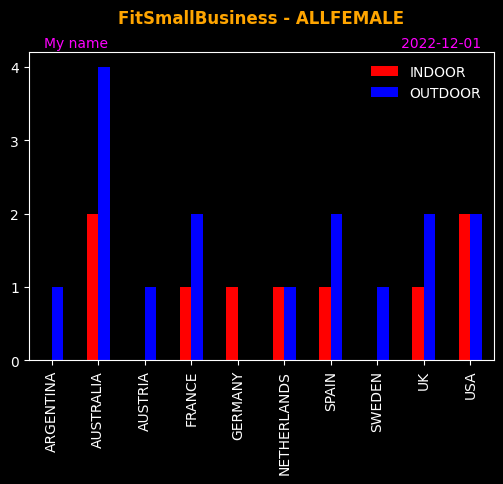

In [375]:
cols = ['sports_location', 'sports', 'favorite_color', 'sex', 'language', 'country']
allfemale_sports=allfemale[cols]

fig, ax = plt.subplots(figsize=(6,4))
allfemale_sports.pivot_table(index=['country'], values=['sports'], aggfunc=['count'], columns=['sports_location'])\
    .droplevel([0,1], axis=1)\
    .plot(kind='bar', color =['red', 'blue'], ax=ax)
font_x = {'family': 'sans-serif',
            'color':'orange',
            'weight':'bold',
            'size': 12}
ax.set_title('FitSmallBusiness - ALLFEMALE\n', fontdict=font_x )
ax.set_xlabel('')
ax.set_yticks(range(5))
ax.legend(frameon=False)

suptitle_font = {'family':'sans-serif',
                    
                    'weight':'normal',
                    'size': 10}
t1 = '2022-12-01'
plt.suptitle(f'My name {t1:>76}', x=0.15, y=0.92, fontproperties=suptitle_font, 
                color='magenta', 
                horizontalalignment='left')

plt.show()

#### Task 17

In [373]:
print_task_description(17)

Next, PRINT this chart as a PDF with the following filename in this computer's Document folder : ALLFEMALESPORTS CHART BY <YOUR FIRSTNAME LASTNAME>
It`s the last one task


In [376]:
fig.tight_layout()
fig.savefig('./output/all_female_sports_chart_by_me.pdf',)

In [368]:
# fonts available in matplotlib
import matplotlib.font_manager as fm
[(i,font.name) for i,font in enumerate(fm.fontManager.ttflist) if font.name.startswith('C')]
fm.fontManager.ttflist

[FontEntry(fname='/Users/radekmiernicki/Documents/python_projects/excel_test/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/Users/radekmiernicki/Documents/python_projects/excel_test/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable'),
 FontEntry(fname='/Users/radekmiernicki/Documents/python_projects/excel_test/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'),
 FontEntry(fname='/Users/radekmiernicki/Documents/python_projects/excel_test/venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='no